In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bethel us
hilo us
castro cl
clyde river ca
cidreira br
rambha in
cherskiy ru
grand river south east mu
nikolskoye ru
caravelas br
svetlaya ru
lethem gy
balimo pg
hobart au
rikitea pf
tiksi ru
yumen cn
punta arenas cl
namibe ao
provideniya ru
cayenne gf
tsihombe mg
mar del plata ar
punta arenas cl
qaanaaq gl
berlevag no
provideniya ru
taolanaro mg
guerrero negro mx
ust-tsilma ru
ankara tr
pangai to
puerto narino co
bredasdorp za
tumannyy ru
rikitea pf
pisco pe
sulurpeta in
ushuaia ar
rikitea pf
emerald au
tskneti ge
kodiak us
dikson ru
qaanaaq gl
vaini to
hobart au
busselton au
puerto ayora ec
umzimvubu za
hithadhoo mv
atuona pf
darab ir
rikitea pf
kieta pg
punta arenas cl
kahului us
thompson ca
bethel us
okhotsk ru
soyo ao
new norfolk au
rikitea pf
sobolevo ru
rikitea pf
ushuaia ar
tasiilaq gl
nizhneyansk ru
hithadhoo mv
jamestown sh
vaini to
tailai cn
mataura pf
geraldton au
eureka us
tucumcari us
avarua ck
barrow us
la ronge ca
punta arenas cl
avarua ck
taolanaro mg
chuy uy
leningrad

barentsburg sj
port alfred za
hermanus za
punta arenas cl
punta arenas cl
sao joao da barra br
rikitea pf
bredasdorp za
hithadhoo mv
ushuaia ar
rikitea pf
hilo us
parintins br
shimoda jp
kaitangata nz
dakar sn
aksarka ru
mount isa au
taolanaro mg
cape town za
rikitea pf
avarua ck
ushuaia ar
umzimvubu za
pokanayevka ru
kodiak us
ushuaia ar
rikitea pf
puerto ayora ec
luwuk id
cherskiy ru
busselton au
ushuaia ar
ancud cl
samarai pg
bengkulu id
ushuaia ar
arraial do cabo br
mataura pf
souillac mu
asau tv
tomatlan mx
phan rang vn
pampa us
fort collins us
yellowknife ca
tecoanapa mx
zhigansk ru
port hardy ca
igrim ru
kodiak us
kasane bw
illoqqortoormiut gl
hobart au
kitimat ca
mar del plata ar
narsaq gl
hermanus za
alice springs au
muros es
oktyabrskiy ru
albany au
jamestown sh
beya ru
port alfred za
longyearbyen sj
jalu ly
nova olimpia br
hithadhoo mv
atuona pf
butaritari ki
kavaratti in
jaciara br
tautira pf
peleduy ru
maloshuyka ru
taolanaro mg
tagusao ph
jamestown sh
kapaa us
cape town z

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [8]:
# Import the requests library.
import requests
requests.__version__

'2.24.0'

In [9]:
# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ebdcf3685d3f8793b3ab767dcec3c7db


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | rambha
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | caravelas
Processing Record 11 of Set 1 | svetlaya
Processing Record 12 of Set 1 | lethem
Processing Record 13 of Set 1 | balimo
City not found. Skipping...
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | yumen
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | cayenne
Processing Record 22 of Set 1 |

Processing Record 35 of Set 4 | palana
Processing Record 36 of Set 4 | sabang
Processing Record 37 of Set 4 | ibra
Processing Record 38 of Set 4 | havoysund
Processing Record 39 of Set 4 | trairi
Processing Record 40 of Set 4 | waverley
Processing Record 41 of Set 4 | grand gaube
Processing Record 42 of Set 4 | lydenburg
Processing Record 43 of Set 4 | inuvik
Processing Record 44 of Set 4 | camacha
Processing Record 45 of Set 4 | jiangyou
Processing Record 46 of Set 4 | broken hill
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | nishihara
Processing Record 49 of Set 4 | barcelos
Processing Record 50 of Set 4 | karamea
City not found. Skipping...
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | mezhdurechenskiy
Processing Record 3 of Set 5 | praya
Processing Record 4 of Set 5 | oranjemund
Processing Record 5 of Set 5 | hirara
Processing Record 6 of Set 5 | danielskuil
Processing Record 7 of Set 5 | hachinohe
Processing Record 8 of Set 5

Processing Record 22 of Set 8 | ustka
Processing Record 23 of Set 8 | hambantota
Processing Record 24 of Set 8 | ryotsu
Processing Record 25 of Set 8 | pointe michel
Processing Record 26 of Set 8 | linhares
Processing Record 27 of Set 8 | zheleznodorozhnyy
Processing Record 28 of Set 8 | olden
Processing Record 29 of Set 8 | belmonte
Processing Record 30 of Set 8 | abu zabad
Processing Record 31 of Set 8 | the pas
Processing Record 32 of Set 8 | saraza
Processing Record 33 of Set 8 | luanda
Processing Record 34 of Set 8 | vyshneve
Processing Record 35 of Set 8 | saleaula
City not found. Skipping...
Processing Record 36 of Set 8 | makakilo city
Processing Record 37 of Set 8 | kapit
Processing Record 38 of Set 8 | zaplavnoye
Processing Record 39 of Set 8 | tres arroyos
Processing Record 40 of Set 8 | haines junction
Processing Record 41 of Set 8 | orlik
Processing Record 42 of Set 8 | ponta do sol
Processing Record 43 of Set 8 | buta
Processing Record 44 of Set 8 | pascagoula
Processing 

Processing Record 13 of Set 12 | griffith
Processing Record 14 of Set 12 | chapais
Processing Record 15 of Set 12 | thamaga
Processing Record 16 of Set 12 | maceio
Processing Record 17 of Set 12 | lensk
Processing Record 18 of Set 12 | asfi
Processing Record 19 of Set 12 | riyadh
Processing Record 20 of Set 12 | clifton springs
Processing Record 21 of Set 12 | fukue
Processing Record 22 of Set 12 | jicaro galan
Processing Record 23 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 24 of Set 12 | puerto madero
Processing Record 25 of Set 12 | hami
Processing Record 26 of Set 12 | nanakuli
Processing Record 27 of Set 12 | bababe
City not found. Skipping...
Processing Record 28 of Set 12 | ilulissat
Processing Record 29 of Set 12 | byron bay
Processing Record 30 of Set 12 | udachnyy
Processing Record 31 of Set 12 | sai buri
Processing Record 32 of Set 12 | chapleau
Processing Record 33 of Set 12 | iquitos
Processing Record 34 of Set 12 | piacabucu
Processing Re

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.37,-73.41,41.00,75,90,5.82,US,2020-12-31 18:40:51
1,Hilo,19.73,-155.09,69.80,88,90,5.82,US,2020-12-31 18:40:30
2,Castro,-24.79,-50.01,64.31,93,100,8.79,BR,2020-12-31 18:40:39
3,Clyde River,70.47,-68.59,-0.40,91,75,20.80,CA,2020-12-31 18:40:46
4,Cidreira,-30.18,-50.21,76.41,55,0,17.34,BR,2020-12-31 18:40:37
5,Rambha,19.52,85.10,67.96,75,0,3.42,IN,2020-12-31 18:46:47
6,Cherskiy,68.75,161.30,-41.30,81,100,3.65,RU,2020-12-31 18:46:48
7,Nikolskoye,59.70,30.79,33.80,97,90,4.47,RU,2020-12-31 18:42:17
8,Caravelas,-17.71,-39.25,81.52,66,0,11.01,BR,2020-12-31 18:46:48
9,Svetlaya,46.54,138.33,-7.22,80,0,12.71,RU,2020-12-31 18:46:49


In [15]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2020-12-31 18:40:51,41.37,-73.41,41.00,75,90,5.82
1,Hilo,US,2020-12-31 18:40:30,19.73,-155.09,69.80,88,90,5.82
2,Castro,BR,2020-12-31 18:40:39,-24.79,-50.01,64.31,93,100,8.79
3,Clyde River,CA,2020-12-31 18:40:46,70.47,-68.59,-0.40,91,75,20.80
4,Cidreira,BR,2020-12-31 18:40:37,-30.18,-50.21,76.41,55,0,17.34
5,Rambha,IN,2020-12-31 18:46:47,19.52,85.10,67.96,75,0,3.42
6,Cherskiy,RU,2020-12-31 18:46:48,68.75,161.30,-41.30,81,100,3.65
7,Nikolskoye,RU,2020-12-31 18:42:17,59.70,30.79,33.80,97,90,4.47
8,Caravelas,BR,2020-12-31 18:46:48,-17.71,-39.25,81.52,66,0,11.01
9,Svetlaya,RU,2020-12-31 18:46:49,46.54,138.33,-7.22,80,0,12.71


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

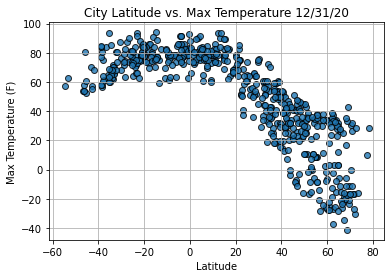

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

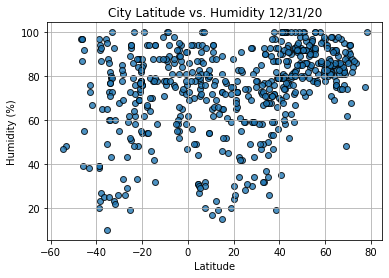

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

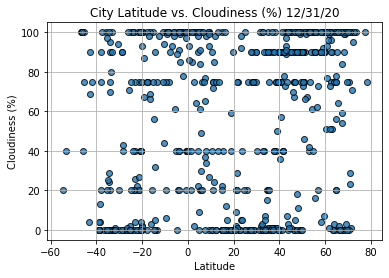

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

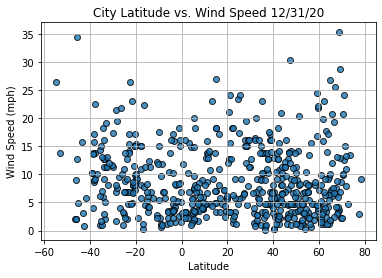

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2020-12-31 18:40:51,41.37,-73.41,41.00,75,90,5.82
1,Hilo,US,2020-12-31 18:40:30,19.73,-155.09,69.80,88,90,5.82
3,Clyde River,CA,2020-12-31 18:40:46,70.47,-68.59,-0.40,91,75,20.80
5,Rambha,IN,2020-12-31 18:46:47,19.52,85.10,67.96,75,0,3.42
6,Cherskiy,RU,2020-12-31 18:46:48,68.75,161.30,-41.30,81,100,3.65


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

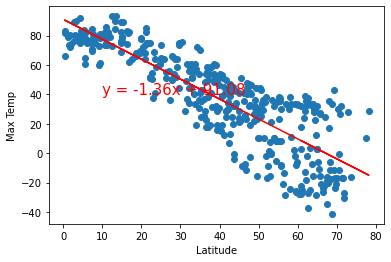

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

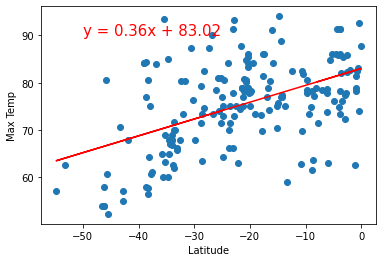

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

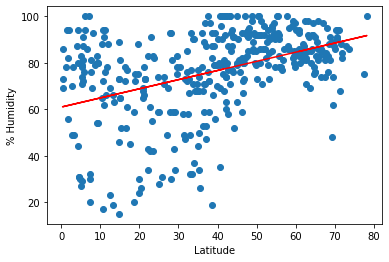

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

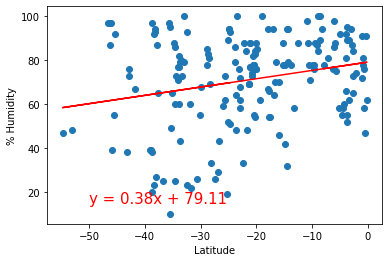

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity','% Humidity',(-50,15))

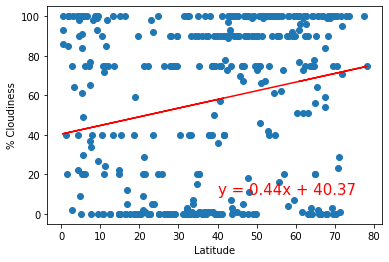

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

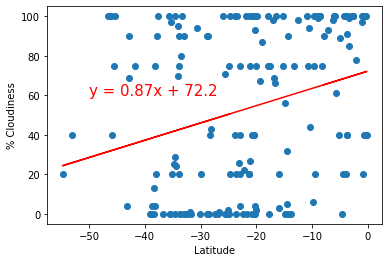

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

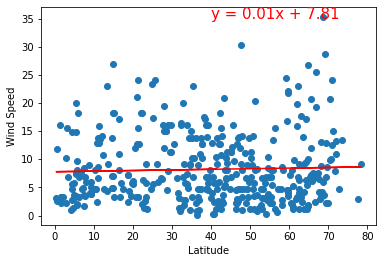

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

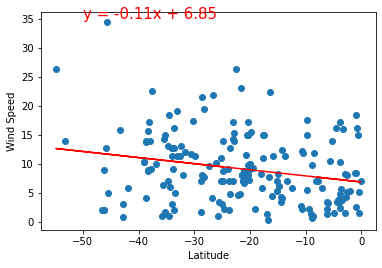

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
